In [2]:
!export AUTOGRAPH_VERBOSITY=0
import warnings
warnings.filterwarnings("ignore")
warnings.filterwarnings('ignore', category=DeprecationWarning)
warnings.filterwarnings('ignore', category=FutureWarning)
from tensorflow.python.util import deprecation
deprecation._PRINT_DEPRECATION_WARNINGS = False
import tensorflow.python.util.deprecation as deprecation
deprecation._PRINT_DEPRECATION_WARNINGS = False
import tensorflow as tf 
tf.compat.v1.logging.set_verbosity(tf.compat.v1.logging.ERROR)
# tf.compat.v1.logging.set_verbosity(100)

In [3]:
%load_ext autoreload
%autoreload 2
import cantera as ct
import os
import gym 
import numpy as np 
import pandas as pd
from stable_baselines.common.policies import MlpPolicy, CnnLstmPolicy,MlpLstmPolicy
from stable_baselines.common.vec_env import SubprocVecEnv
from stable_baselines.bench import Monitor
from stable_baselines.results_plotter import load_results, ts2xy
from stable_baselines.common import set_global_seeds
from stable_baselines import ACKTR, PPO2
from envs.sim_env import SimEnv, NO_idx, CO_idx, O2_idx, H2O_idx
from envs.SimUtils import solvePhi_airSplit, equil, runMainBurner, correctNOx
import seaborn as sns

In [4]:
model = PPO2.load('Trained Models/PPO2_MlpLstmPolicy_Night_Dummy_11182019_64000.zip')

In [5]:
from stable_baselines.common.vec_env import DummyVecEnv
sim_env = SimEnv()
env = DummyVecEnv([lambda: sim_env])
# env = SimEnv()
obs = env.reset()
env.action_space.high

array([1., 1., 1.])

In [6]:
model.set_env(env)

In [7]:
model.predict(env.reset())

InternalError: 2 root error(s) found.
  (0) Internal: Blas GEMM launch failed : a.shape=(1, 1080), b.shape=(1080, 64), m=1, n=64, k=1080
	 [[node model/pi_fc0/MatMul (defined at /home/edwin/anaconda3/envs/tf1_env/lib/python3.7/site-packages/stable_baselines/a2c/utils.py:158) ]]
	 [[model/concat/_63]]
  (1) Internal: Blas GEMM launch failed : a.shape=(1, 1080), b.shape=(1080, 64), m=1, n=64, k=1080
	 [[node model/pi_fc0/MatMul (defined at /home/edwin/anaconda3/envs/tf1_env/lib/python3.7/site-packages/stable_baselines/a2c/utils.py:158) ]]
0 successful operations.
0 derived errors ignored.

Errors may have originated from an input operation.
Input Source operations connected to node model/pi_fc0/MatMul:
 model/flatten/Reshape (defined at /home/edwin/anaconda3/envs/tf1_env/lib/python3.7/site-packages/stable_baselines/common/policies.py:421)	
 model/pi_fc0/w/read (defined at /home/edwin/anaconda3/envs/tf1_env/lib/python3.7/site-packages/stable_baselines/a2c/utils.py:156)

Input Source operations connected to node model/pi_fc0/MatMul:
 model/flatten/Reshape (defined at /home/edwin/anaconda3/envs/tf1_env/lib/python3.7/site-packages/stable_baselines/common/policies.py:421)	
 model/pi_fc0/w/read (defined at /home/edwin/anaconda3/envs/tf1_env/lib/python3.7/site-packages/stable_baselines/a2c/utils.py:156)

Original stack trace for 'model/pi_fc0/MatMul':
  File "/home/edwin/anaconda3/envs/tf1_env/lib/python3.7/runpy.py", line 193, in _run_module_as_main
    "__main__", mod_spec)
  File "/home/edwin/anaconda3/envs/tf1_env/lib/python3.7/runpy.py", line 85, in _run_code
    exec(code, run_globals)
  File "/home/edwin/anaconda3/envs/tf1_env/lib/python3.7/site-packages/ipykernel_launcher.py", line 16, in <module>
    app.launch_new_instance()
  File "/home/edwin/anaconda3/envs/tf1_env/lib/python3.7/site-packages/traitlets/config/application.py", line 664, in launch_instance
    app.start()
  File "/home/edwin/anaconda3/envs/tf1_env/lib/python3.7/site-packages/ipykernel/kernelapp.py", line 563, in start
    self.io_loop.start()
  File "/home/edwin/anaconda3/envs/tf1_env/lib/python3.7/site-packages/tornado/platform/asyncio.py", line 148, in start
    self.asyncio_loop.run_forever()
  File "/home/edwin/anaconda3/envs/tf1_env/lib/python3.7/asyncio/base_events.py", line 534, in run_forever
    self._run_once()
  File "/home/edwin/anaconda3/envs/tf1_env/lib/python3.7/asyncio/base_events.py", line 1771, in _run_once
    handle._run()
  File "/home/edwin/anaconda3/envs/tf1_env/lib/python3.7/asyncio/events.py", line 88, in _run
    self._context.run(self._callback, *self._args)
  File "/home/edwin/anaconda3/envs/tf1_env/lib/python3.7/site-packages/tornado/ioloop.py", line 690, in <lambda>
    lambda f: self._run_callback(functools.partial(callback, future))
  File "/home/edwin/anaconda3/envs/tf1_env/lib/python3.7/site-packages/tornado/ioloop.py", line 743, in _run_callback
    ret = callback()
  File "/home/edwin/anaconda3/envs/tf1_env/lib/python3.7/site-packages/tornado/gen.py", line 787, in inner
    self.run()
  File "/home/edwin/anaconda3/envs/tf1_env/lib/python3.7/site-packages/tornado/gen.py", line 748, in run
    yielded = self.gen.send(value)
  File "/home/edwin/anaconda3/envs/tf1_env/lib/python3.7/site-packages/ipykernel/kernelbase.py", line 361, in process_one
    yield gen.maybe_future(dispatch(*args))
  File "/home/edwin/anaconda3/envs/tf1_env/lib/python3.7/site-packages/tornado/gen.py", line 209, in wrapper
    yielded = next(result)
  File "/home/edwin/anaconda3/envs/tf1_env/lib/python3.7/site-packages/ipykernel/kernelbase.py", line 268, in dispatch_shell
    yield gen.maybe_future(handler(stream, idents, msg))
  File "/home/edwin/anaconda3/envs/tf1_env/lib/python3.7/site-packages/tornado/gen.py", line 209, in wrapper
    yielded = next(result)
  File "/home/edwin/anaconda3/envs/tf1_env/lib/python3.7/site-packages/ipykernel/kernelbase.py", line 541, in execute_request
    user_expressions, allow_stdin,
  File "/home/edwin/anaconda3/envs/tf1_env/lib/python3.7/site-packages/tornado/gen.py", line 209, in wrapper
    yielded = next(result)
  File "/home/edwin/anaconda3/envs/tf1_env/lib/python3.7/site-packages/ipykernel/ipkernel.py", line 300, in do_execute
    res = shell.run_cell(code, store_history=store_history, silent=silent)
  File "/home/edwin/anaconda3/envs/tf1_env/lib/python3.7/site-packages/ipykernel/zmqshell.py", line 536, in run_cell
    return super(ZMQInteractiveShell, self).run_cell(*args, **kwargs)
  File "/home/edwin/anaconda3/envs/tf1_env/lib/python3.7/site-packages/IPython/core/interactiveshell.py", line 2855, in run_cell
    raw_cell, store_history, silent, shell_futures)
  File "/home/edwin/anaconda3/envs/tf1_env/lib/python3.7/site-packages/IPython/core/interactiveshell.py", line 2881, in _run_cell
    return runner(coro)
  File "/home/edwin/anaconda3/envs/tf1_env/lib/python3.7/site-packages/IPython/core/async_helpers.py", line 68, in _pseudo_sync_runner
    coro.send(None)
  File "/home/edwin/anaconda3/envs/tf1_env/lib/python3.7/site-packages/IPython/core/interactiveshell.py", line 3058, in run_cell_async
    interactivity=interactivity, compiler=compiler, result=result)
  File "/home/edwin/anaconda3/envs/tf1_env/lib/python3.7/site-packages/IPython/core/interactiveshell.py", line 3249, in run_ast_nodes
    if (await self.run_code(code, result,  async_=asy)):
  File "/home/edwin/anaconda3/envs/tf1_env/lib/python3.7/site-packages/IPython/core/interactiveshell.py", line 3326, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "<ipython-input-4-31df4c7d23de>", line 1, in <module>
    model = PPO2.load('Trained Models/PPO2_MlpLstmPolicy_Night_Dummy_11182019_64000.zip')
  File "/home/edwin/anaconda3/envs/tf1_env/lib/python3.7/site-packages/stable_baselines/common/base_class.py", line 850, in load
    model.setup_model()
  File "/home/edwin/anaconda3/envs/tf1_env/lib/python3.7/site-packages/stable_baselines/ppo2/ppo2.py", line 133, in setup_model
    n_batch_step, reuse=False, **self.policy_kwargs)
  File "/home/edwin/anaconda3/envs/tf1_env/lib/python3.7/site-packages/stable_baselines/common/policies.py", line 682, in __init__
    layer_norm=False, feature_extraction="mlp", **_kwargs)
  File "/home/edwin/anaconda3/envs/tf1_env/lib/python3.7/site-packages/stable_baselines/common/policies.py", line 424, in __init__
    init_scale=np.sqrt(2)))
  File "/home/edwin/anaconda3/envs/tf1_env/lib/python3.7/site-packages/stable_baselines/a2c/utils.py", line 158, in linear
    return tf.matmul(input_tensor, weight) + bias
  File "/home/edwin/anaconda3/envs/tf1_env/lib/python3.7/site-packages/tensorflow/python/util/dispatch.py", line 180, in wrapper
    return target(*args, **kwargs)
  File "/home/edwin/anaconda3/envs/tf1_env/lib/python3.7/site-packages/tensorflow/python/ops/math_ops.py", line 2647, in matmul
    a, b, transpose_a=transpose_a, transpose_b=transpose_b, name=name)
  File "/home/edwin/anaconda3/envs/tf1_env/lib/python3.7/site-packages/tensorflow/python/ops/gen_math_ops.py", line 5925, in mat_mul
    name=name)
  File "/home/edwin/anaconda3/envs/tf1_env/lib/python3.7/site-packages/tensorflow/python/framework/op_def_library.py", line 788, in _apply_op_helper
    op_def=op_def)
  File "/home/edwin/anaconda3/envs/tf1_env/lib/python3.7/site-packages/tensorflow/python/util/deprecation.py", line 507, in new_func
    return func(*args, **kwargs)
  File "/home/edwin/anaconda3/envs/tf1_env/lib/python3.7/site-packages/tensorflow/python/framework/ops.py", line 3616, in create_op
    op_def=op_def)
  File "/home/edwin/anaconda3/envs/tf1_env/lib/python3.7/site-packages/tensorflow/python/framework/ops.py", line 2005, in __init__
    self._traceback = tf_stack.extract_stack()


In [ ]:
import pdb 
game_over = False
results_list = []
while not game_over: 
    action, _states = model.predict(obs)
#     action = env.action_space.high[np.newaxis,:]
#     action = env.action_space.high[np.newaxis,:]
    obs, rewards, game_over, info = env.step(action)
    env.render(mode='human')
    g = env.envs[0].sec_stage_gas
    results_list.append([
        env.envs[0].age/1e-3, 
        g.T, 
        correctNOx(g.X[NO_idx], g.X[H2O_idx], g.X[O2_idx]),
        correctNOx(g.X[CO_idx], g.X[H2O_idx], g.X[O2_idx]),
        env.envs[0].mfc_main.mdot(0),
        env.envs[0].mfc_fuel_sec.mdot(0),
        env.envs[0].mfc_air_sec.mdot(0), 
        env.envs[0].remaining_main_burner_mass,
        env.envs[0].sec_fuel_remaining,
        env.envs[0].sec_air_remaining,
        rewards, ])

In [20]:
[env.step([[1,1,1]]) for i in range(4998)]

[(array([[[ 1.49903451e+03,  5.76551208e+00,  8.68210137e-08, ...,
           -6.87923958e-12, -9.56443356e-16, -7.27217481e-12],
          [ 1.49903451e+03,  5.76551208e+00,  8.68206023e-08, ...,
           -6.87923958e-12, -9.56443356e-16, -7.27217481e-12],
          [ 1.49903451e+03,  5.76551208e+00,  8.68201910e-08, ...,
           -6.87923958e-12, -9.56443356e-16, -7.27217481e-12],
          ...,
          [ 1.49903451e+03,  5.76551208e+00,  8.68181354e-08, ...,
           -6.87923958e-12, -9.56443356e-16, -7.27217481e-12],
          [ 1.49903451e+03,  5.76551208e+00,  8.68177245e-08, ...,
           -6.87923958e-12, -9.56443356e-16, -7.27217481e-12],
          [ 1.08185858e+03,  7.68790748e+00,  4.31256635e-09, ...,
            8.90972536e-06,  2.09117625e-08,  8.07982773e-08]]]),
  array([211.31479], dtype=float32),
  array([False]),
  [{}]),
 (array([[[ 1.49903451e+03,  5.76551208e+00,  8.68206023e-08, ...,
           -6.87923958e-12, -9.56443356e-16, -7.27217481e-12],
        

In [22]:
env.envs[0].reward_T, env.envs[0].reward_NO, env.envs[0].reward_reactants

(50.01135501144086, 0.058907058547815146, 9992.907907541396)

In [24]:
env.envs[0].calculate_reward()

> /home/edwin/Documents/ReinforcementKinetics/envs/sim_env.py(224)calculate_reward()
-> T_threshold_percent = 0.9*0.005 # +-10K for 1975K
(Pdb) T_distance_percent
0.00439906656323492
(Pdb) n
> /home/edwin/Documents/ReinforcementKinetics/envs/sim_env.py(225)calculate_reward()
-> self.reward_T = 100*sigmoid(-T_threshold_percent*1000*(T_distance_percent - T_threshold_percent)) # see reward shaping.ipynb
(Pdb) reward_T = 100*sigmoid(-T_threshold_percent*1000*(T_distance_percent - T_threshold_percent))
(Pdb) reward_T
50.01135501144086
(Pdb) reward_T = 100*sigmoid(-T_threshold_percent*1000*(0 - T_threshold_percent))
(Pdb) reward_T
50.50623270119764
(Pdb) 100*sigmoid(-T_threshold_percent*1000*(0 - T_threshold_percent))
50.50623270119764
(Pdb) T_threshold_percent
0.0045000000000000005
(Pdb) q


BdbQuit: 

In [16]:
df = pd.DataFrame(data=np.vstack(results_list), columns=['age', 'T', 'NO', 'CO', 'mdot_main', 'mdot_fuel_sec', 'mdot_air_sec', 'rem_main', 'rem_fuel_sec', 'rem_air_sec', 'reward'])
df = df.iloc[0:-1]
# df.to_csv("simResults_500000.csv", index=False)

In [ ]:
df

In [ ]:
df['mdot_main'].hist()

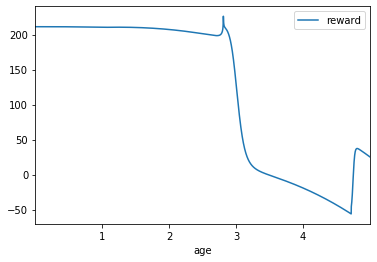

In [18]:
df.plot('age', 'reward')

In [ ]:
env.envs[0].action_space.high[2]